In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Q1
Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.
org/portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable
à expliquer. Les autres colonnes sont les variables explicatives. Préciser le nombre de
variables explicatives et le nombre d’observations.

In [2]:
#diabetes = pd.read_csv('https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv',header=None)
diabetes = np.array(pd.read_csv('data_dm3.csv',header=None))

In [3]:
y = diabetes[:,-1]
X = diabetes[:,:-1]
print('Nombre d’observations : {}'.format(len(y)))
print('Nombre de variables explicatives : {}'.format(X.shape[1]))

Nombre d’observations : 442
Nombre de variables explicatives : 210


### Q2
Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à
expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard
et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en
fonction de chacune des autres). Commenter les graphiques obtenus.

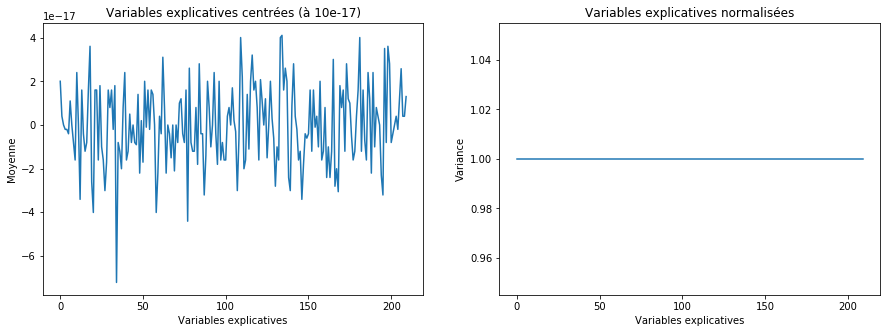

In [4]:
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.xlabel("Variables explicatives")
plt.ylabel("Moyenne")
plt.title("Variables explicatives centrées (à 10e-17)")
plt.plot(np.mean(X, axis=0))
plt.subplot(122)
plt.xlabel("Variables explicatives")
plt.ylabel("Variance")
plt.title("Variables explicatives normalisées")
plt.plot(np.var(X, axis=0))
plt.show;

In [5]:
print('Moyenne de la variable à expliquer : {:.2f}'.format(np.mean(y)))
print('Ecart type de la variable à expliquer : {:.2f}'.format(np.std(y)))

Moyenne de la variable à expliquer : 152.13
Ecart type de la variable à expliquer : 77.01


#### Les variables explicatives sont centrées réduites.
#### La variable à expliquer n'est pas centrée et a une forte variance (écart type égal à la moitié de la moyenne).

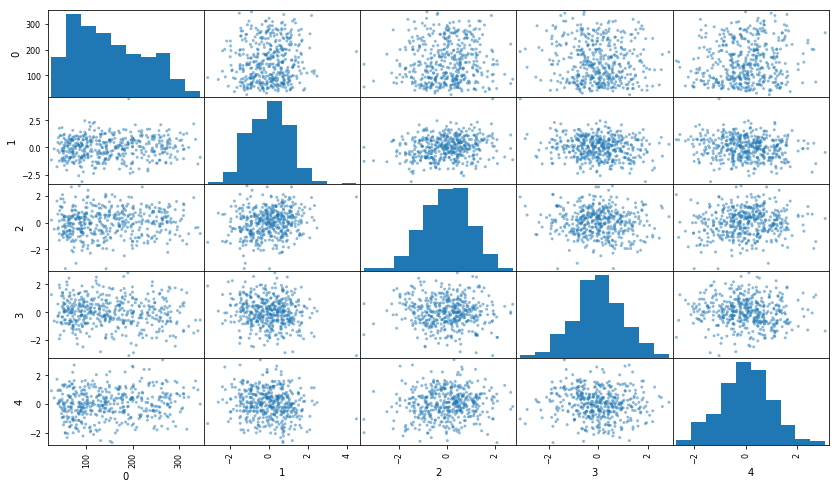

In [6]:
import seaborn as sns
from random import randint

numvar=[]
for i in range(4):
    numvar.append(randint(0,X.shape[1]))    
X4 = X[:,numvar]

# passage au DataFrame pour utiliser la fonction pd.plotting.scatter_matrix
M = pd.DataFrame(np.concatenate((y.reshape(len(y),1),X4), axis=1))
pd.plotting.scatter_matrix(M,figsize=(14, 8))
plt.show()

#### Prise 2 à 2, il ne semple pas y avoir de corrélation entre les 4 variables explicatives et la variable à expliquer.

### Q3
Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle
Xtrain, un pour tester le modèle Xtest. On mettra 20% de la base dans l’échantillon ’test’.
Donner les tailles de chacun des 2 échantillons. On notera que le nouvel échantillon de
covariables Xtrain n’est pas normalizé. Dans la suite, on fera donc bien attention à inclure
l’intercept dans nos régression.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print("Echantillon train : {:.0f} patients".format(len(X_train)))
print("Echantillon test : {:.0f} patients".format(len(X_test)))

Echantillon train : 353 patients
Echantillon test : 89 patients


### Q4
Donner la matrice de covariance calculée sur Xtrain. Tracer le graphe de la décroissance des
valeurs propres de la matrice de covariance (ou de corrélation). Expliquer pourquoi il est
légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans
la suite.

In [8]:
# Matrice de covariance
# X_train_cov = np.cov(X_train)
#X_train_cov = np.dot(X_train.T, X_train) / len(y_train)
X_train_cov = np.dot(X_train.T, X_train)

#Calcul des valeurs propres et vecteurs propres
valeurs_propres, vecteurs_propres = np.linalg.eigh(X_train_cov)

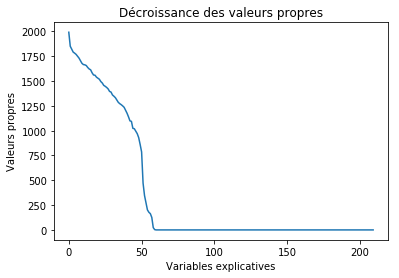

In [9]:
plt.figure()
# Attention : np.linalg.eigh retourne les valeurs propres classées en ordre croissant
plt.plot(valeurs_propres[::-1])
plt.xlabel("Variables explicatives")
plt.ylabel("Valeurs propres")
plt.title("Décroissance des valeurs propres")
plt.show;

Seules 60 valeurs propres sont différentes de 0. Les variables explicatives dont la valeur propre est égale à 0 sont des combinaisons linéaires de ces 60 premières variables de l'ACP.

### Q5
Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS"
qui consiste à appliquer OLS avec Y et XtrainV(1:60), où V(1:60) contient les vecteurs propres
(associés aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression
linéaire (avec intercept), puis tracer les valeurs des coefficients (hors intercept).
Sur un autre graphique, faire de même avec la méthode des moindres carrés classique.

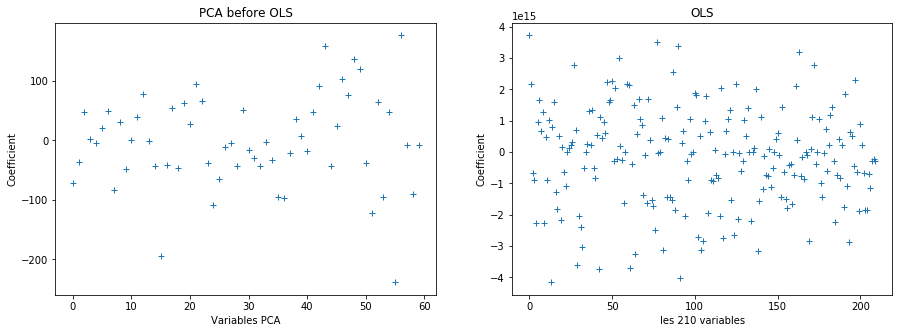

In [10]:
from sklearn import linear_model

X_PCA=np.dot(X_train,vecteurs_propres[150:].T)
OLS_PCA = linear_model.LinearRegression(fit_intercept=True)
OLS_PCA.fit(X_PCA, y_train)

OLS = linear_model.LinearRegression(fit_intercept=True)
OLS.fit(X_train, y_train)

plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.xlabel("Variables PCA")
plt.ylabel("Coefficient")
plt.title("PCA before OLS")
plt.plot(OLS_PCA.coef_,'+')
plt.subplot(122)
plt.xlabel("les 210 variables")
plt.ylabel("Coefficient")
plt.title("OLS")
plt.plot(OLS.coef_,'+')
plt.show;

### Q6
Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur
moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ?
Commenter. Uniquement pour cette question, centrer et réduire les variables après ACP
(de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est
bien égal à la moyenne de Y sut le train.

In [11]:
print("Intercept (PCA before OLS) = {:.2f}".format(OLS_PCA.intercept_))
print("Intercept (OLS) = {:.2f}".format(OLS.intercept_))
print("Moyenne de y (sur le train set) = {:.2f}".format(np.mean(y_train)))

Intercept (PCA before OLS) = 151.99
Intercept (OLS) = 153.06
Moyenne de y (sur le train set) = 153.67


Les données du train set ne sont pas centrées, cela explique pourquoi l'intercept n'est pas exactement égal à la moyenne de y_train.

In [12]:
from sklearn import preprocessing

X_PCA_scaled= preprocessing.scale(X_PCA)
OLS_PCA_scaled = linear_model.LinearRegression()
OLS_PCA_scaled.fit(X_PCA_scaled , y_train)

print("Intercept (PCA before OLS) = {:.2f}".format(OLS_PCA_scaled.intercept_))
print("Moyenne de y (sur le train set) = {:.2f}".format(np.mean(y_train)))

Intercept (PCA before OLS) = 153.67
Moyenne de y (sur le train set) = 153.67


On vérifie cette fois que l'intercept est égal à la moyenne de y_train.

### Q7
Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur
l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme).
Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction
sur l’échantillon test.

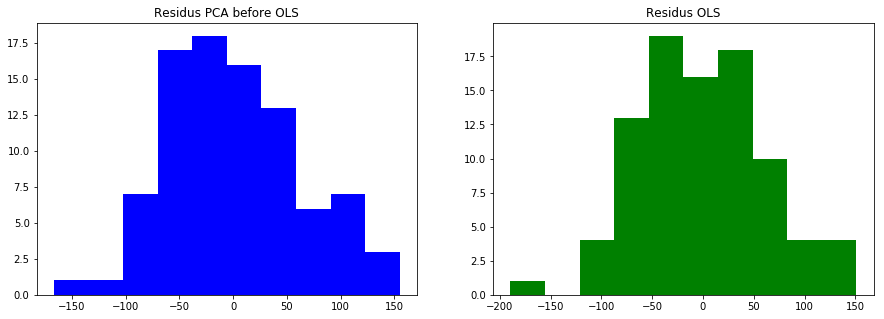

In [13]:
X_test_PCA = np.dot(X_test,vecteurs_propres[150:].T)
y_OLS_PCA = OLS_PCA.predict(X_test_PCA)
y_OLS = OLS.predict(X_test)

residus_OLS = y_OLS - y_test
residus_OLS_PCA = y_OLS_PCA - y_test

plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.title("Residus PCA before OLS")
plt.hist(residus_OLS, color="b")
plt.subplot(122)
plt.title("Residus OLS")
plt.hist(residus_OLS_PCA, color="g")
plt.show;

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

R_pred_OLS_PCA = mean_squared_error(y_test,y_OLS_PCA)
R2_OLS_PCA = r2_score(y_test,y_OLS_PCA)
R_pred_OLS = mean_squared_error(y_test,y_OLS)
R2_OLS = r2_score(y_test,y_OLS)

print("PCA before OLS")
print("Risque de prédiction : {:.0f}".format(R_pred_OLS_PCA))
print("Coefficient de détermination : {:.2f}".format(R2_OLS_PCA))
print()
print("OLS")
print("Risque de prédiction : {:.0f}".format(R_pred_OLS))
print("Coefficient de détermination : {:.2f}".format(R2_OLS))

PCA before OLS
Risque de prédiction : 3759
Coefficient de détermination : 0.31

OLS
Risque de prédiction : 3918
Coefficient de détermination : 0.28


Pour les 2 mesures, le résultat PCA before OLS est meilleur.

### Q8
Coder la méthode de forward variable sélection. On pourra utiliser la statistique du test de
nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret
sur la méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver
la totalité des variables. Afficher l’ordre de séléction des variables.

In [15]:
import math

# initialisations
n = len(y_train)
p = X_train.shape[1] + 1
Xt = np.concatenate((np.ones((n,1)), X_train), axis=1) 
r = y_train
list_ind = []

# algo simple pour la sélection des variables
for step in range (p):
    T = np.zeros(p)
    for k in range(p):
        if k-1 in list_ind:
            continue
        else:
            coef = linear_model.LinearRegression(fit_intercept=False).fit(Xt[:,k].reshape(n,1), r).coef_[0]
            sigma = math.sqrt(np.linalg.norm(r - coef*Xt[:,k]) / (n - 1)) 
            T[k] = abs(coef / sigma) / math.sqrt(np.linalg.norm(Xt[:,k]))
    winner = np.argsort(-T)[0]
    list_ind.append(winner-1)  
    r = r - coef*Xt[:,winner]

print("Indices des variables sélectionnées :", list_ind )

Indices des variables sélectionnées : [-1, 58, 123, 34, 167, 23, 174, 133, 79, 99, 135, 49, 28, 125, 85, 162, 142, 161, 157, 20, 141, 18, 200, 138, 184, 196, 146, 121, 47, 152, 159, 19, 154, 84, 94, 149, 69, 52, 120, 191, 201, 166, 102, 67, 189, 33, 0, 16, 205, 193, 178, 80, 36, 31, 14, 39, 32, 4, 82, 73, 115, 55, 104, 169, 13, 42, 204, 107, 198, 147, 10, 63, 127, 2, 114, 209, 143, 183, 72, 61, 11, 116, 78, 130, 124, 25, 171, 153, 89, 27, 70, 126, 6, 60, 68, 199, 35, 192, 175, 187, 203, 155, 179, 53, 165, 170, 51, 88, 44, 43, 64, 156, 139, 118, 9, 41, 101, 65, 21, 15, 150, 194, 66, 3, 106, 144, 105, 59, 163, 45, 71, 111, 92, 158, 54, 208, 108, 40, 112, 57, 207, 185, 100, 93, 98, 91, 148, 117, 8, 95, 110, 190, 197, 129, 140, 38, 22, 103, 137, 1, 62, 182, 77, 24, 87, 7, 119, 145, 164, 181, 74, 128, 30, 96, 81, 195, 172, 50, 97, 86, 113, 83, 136, 202, 186, 180, 177, 134, 188, 75, 151, 173, 17, 37, 5, 56, 26, 160, 48, 168, 132, 29, 76, 46, 206, 176, 131, 122, 12, 90, 109]


La première "variable" sélectionnée, indice -1, est l'intercept.  
Précision : l'indice des "vraies" variables va de 0 à 209

### Q9
Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0:1. Illustrer la méthode
en donnant (i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme
et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii)
le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée).
Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0:1. Enfin on donnera la
liste des variables sélectionnées.

In [32]:
import scipy.stats as stat

# initialisations
r = y_train
list_ind = []
T = np.zeros((p,p))
pvalue = np.zeros(p)
etape_break = 0

# algo complet pour les questions complémentaires
for step in range (p):
    for k in range(p):
        if k-1 in list_ind :
            continue
        else:
            coef = linear_model.LinearRegression(fit_intercept=False).fit(Xt[:,k].reshape(n,1), r).coef_[0]
            sigma = math.sqrt(np.linalg.norm(r - coef*Xt[:,k]) / (n - 1)) 
            #T[step, k] = abs(coef / sigma) / math.sqrt(np.linalg.norm(Xt[:,k]))
            T[step, k] = abs(coef / sigma) / math.sqrt(1 / np.linalg.norm(Xt[:,k]))
    winner = np.argsort(-T[step,:])[0]
    pvalue[step] = 2*(1 - stat.t.cdf(T[step, winner],df=n-1))
    if  (pvalue[step] > 0.1) and (etape_break == 0):
        etape_break = step
    list_ind.append(winner-1)  
    r = r - coef*Xt[:,winner]

array([ 58, 123, 167,  34,  23, 174, 133,  79,  99,  28,  49, 157,  85,
       161, 141, 112, 125,  13, 162,  18, 135, 196, 138,  80,  21, 142,
       153, 178, 130,  30, 159,  20, 193, 116, 172, 149,  22,  17, 115,
        47,  52, 183,  43, 152,  95, 200,  84, 121, 192, 154, 205, 184,
        38,   7,   2,  76, 128,   5,  19,  27, 129, 182,   4, 207, 177,
        98, 146, 203, 179, 106,  91, 209, 189,  63, 158, 166,  36, 114,
       206,  71,  33, 108, 109, 155, 147,  75,  32, 101,  42, 199, 171,
        73,  59, 105, 204,  72, 145,  24,  10,  90, 186, 164, 120, 103,
       175,  37, 124, 122, 131,  94, 202, 176,  45,   9,   3, 195, 104,
        48,  25,  87,  56, 180, 100,  55,  61, 194,  29,  88,  86, 148,
         1, 168,  53,  74,  26,  40,  60, 163, 198, 136, 117,  44,  77,
         0,  31,  46,  97, 191, 144,  89, 185, 181, 102, 197,  57,  92,
       208,  62,  81, 156, 137,  11, 119,  78,  66,  65,  64, 190,  96,
        41, 165, 170, 127,  70,  68, 107,   8, 187, 151,  14, 18

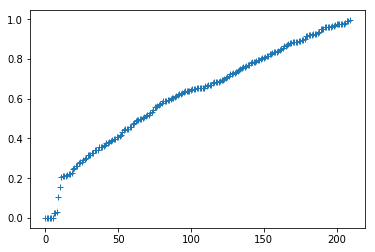

In [49]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
f, pval = f_regression(X_train, y_train, False)
plt.plot(np.sort(pval),'+')
np.argsort(pval)

In [36]:
# cellule à supprimer
print("Nombre de variables sélectionnées :", etape_break)
print("Indices des variables sélectionnées :", list_ind[:15] )
print("Val T des variables sélectionnées step 0 :", T[0,:15])
print("Val T des variables sélectionnées step 1 :", T[1,:15])
print("Val T des variables sélectionnées step 2 :", T[2,:15])
print("pvalue des variables sélectionnées :", pvalue[:50])
print(np.linalg.norm(Xt[:,2]))

Nombre de variables sélectionnées : 201
Indices des variables sélectionnées : [-1, 58, 123, 34, 167, 23, 174, 133, 79, 99, 49, 135, 28, 125, 85]
Val T des variables sélectionnées step 0 : [327.06348355   3.64663938   4.51568446   9.9349766    5.6707027
   9.16662416   9.96147662   1.25300571  10.19416165   1.72278373
   5.64732517   6.14027673   2.5741234    0.64991361  16.12299717]
Val T des variables sélectionnées step 1 : [ 0.          3.57550457  4.42543263  9.81105992  5.55022102  9.10025629
 10.07462694  1.30549436 10.3659697   1.65958829  5.40340033  6.05704253
  2.39580219  0.68698297 15.95624005]
Val T des variables sélectionnées step 2 : [ 0.          4.03253474  4.51888211  9.98893556  5.96110247  9.92440985
  9.90836488  1.92187332 10.66204996  1.81138611  5.82159947  6.58297112
  2.53987676  0.99312626 16.18422392]
pvalue des variables sélectionnées : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

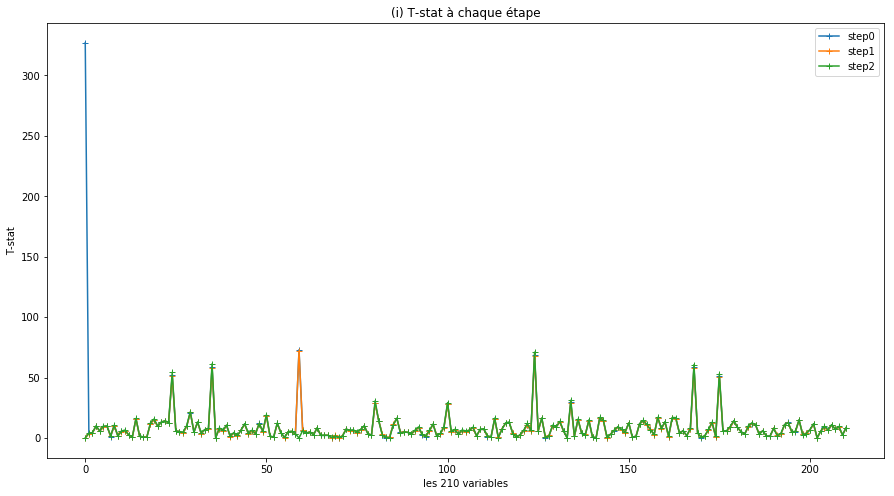

In [37]:
plt.figure(1, figsize=(15, 8))
plt.title("(i) T-stat à chaque étape")
plt.xlabel("les 210 variables")
plt.ylabel("T-stat")
for k in range(0,3):
    plt.plot(T[k,:],'-+', label="step"+str(k))
plt.legend(loc=1)
plt.show;

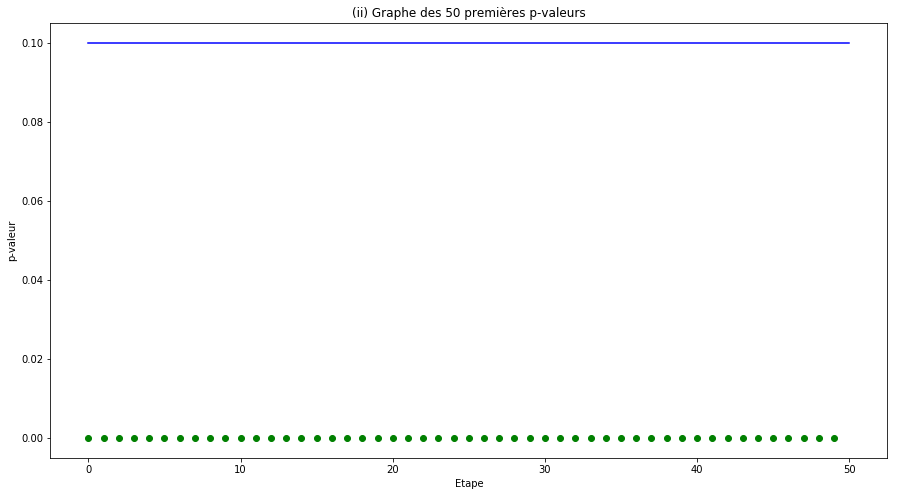

In [35]:
plt.figure(1, figsize=(15, 8))
plt.title("(ii) Graphe des 50 premières p-valeurs")
plt.xlabel("Etape")
plt.ylabel("p-valeur")
plt.plot(pvalue[:50],'o', color='g')
plt.plot([0,50],[.1,.1],color = "b" )
plt.show;

In [20]:
print("Plafond retenu pour les p-valeurs : 0.1")
print("Indices des variables sélectionnées :", list_ind[:etape_break] )

Plafond retenu pour les p-valeurs : 0.1
Indices des variables sélectionnées : [-1, 58, 123, 34, 167, 23, 174, 133, 79, 99]


La première "variable" sélectionnée, indice -1, est l'intercept.  
Précision : l'indice des "vraies" variables va de 0 à 209

### Q10
Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon
test et le comparer à ceux de OLS et PCA before OLS.

In [21]:
X_FVS = X_train[:,list_ind[1:etape_break]]
OLS_FVS = linear_model.LinearRegression()
OLS_FVS.fit(X_FVS , y_train)
X_test_FVS = X_test[:,list_ind[1:etape_break]]
y_FVS = OLS_FVS.predict(X_test_FVS)

In [22]:
R_pred_OLS_FVS = mean_squared_error(y_test,y_FVS)

print("FVS before OLS")
print("Risque de prédiction : {:.0f}".format(R_pred_OLS_FVS))
print()
print("PCA before OLS")
print("Risque de prédiction : {:.0f}".format(R_pred_OLS_PCA))
print()
print("OLS")
print("Risque de prédiction : {:.0f}".format(R_pred_OLS))

FVS before OLS
Risque de prédiction : 3125

PCA before OLS
Risque de prédiction : 3759

OLS
Risque de prédiction : 3918


Le risque de prédiction avec Forward Variable Selection est meilleur.

### Q11
Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées
”folds”) de façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque
fold.

In [23]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle=True)
folds = [ e for e in kf.split(X_train)]
for i in range(4):
    print("Liste des patients train de l\'échantillon numero {:.0f} :".format(i))
    print(folds[i][0])
    print("Liste des patients test de l\'échantillon numero {:.0f} :".format(i))
    print(folds[i][1])


Liste des patients train de l'échantillon numero 0 :
[  1   3   4   5   6   7   9  10  13  14  15  18  19  20  21  23  24  25
  26  28  30  31  32  33  34  35  37  38  39  41  42  43  45  46  47  48
  50  51  52  53  54  56  57  59  60  61  62  63  64  66  67  69  71  72
  73  74  76  77  78  79  80  81  82  84  85  87  88  89  90  91  92  93
  94  95  96  98  99 100 101 102 103 105 106 107 108 109 111 112 115 116
 117 118 119 122 124 125 126 127 128 129 130 132 134 135 139 140 142 143
 144 145 147 148 149 150 151 153 154 156 157 158 160 161 162 164 166 167
 168 169 173 174 175 176 177 178 179 182 185 186 187 188 189 190 191 192
 193 194 195 196 198 199 200 201 202 203 205 206 207 208 209 210 211 212
 213 215 216 218 219 221 224 226 227 228 233 234 235 236 237 238 239 241
 242 243 245 246 247 248 249 250 252 253 254 255 257 259 260 261 262 265
 267 268 269 270 271 272 273 274 276 277 278 279 280 281 282 284 285 286
 287 289 290 291 293 295 297 298 300 301 302 303 306 307 308 309 310 31

### Q12
Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation,
on fera une validation croisée sur les ”folds” définies lors de la question précédente. A
tour de rôle chacune des ”folds” servira pour calculer le risque de prédiction alors que
les autres seront utilisées pour estimer le modèle. On moyennera ensuite les 4 risques de
prédictions. On donnera la courbe du risque de validation croisée en fonction du paramètre
de régularisation (on veillera à bien choisir l’espace de définition pour le graphe). Donner
le paramètre de régularisation optimal et la valeur du risque sur le test.

In [25]:
from sklearn.linear_model import Ridge


lamdas = [10,50,60,65,70,75,80,90,100,110,120,150]
#lamdas = [1]
Rpreds_Ridge = np.zeros(len(lamdas))

for i in range(len(lamdas)):
    Rpred_Ridge = 0
    lamda = lamdas[i]
    model_Ridge = Ridge(lamda, fit_intercept=False)
    
    for j in range(4):
        # Toujours avec Ridge : variables centrées (pas d'intercept)
        X_train_Ridge = X_train[folds[j][0],:]-np.mean(X_train[folds[j][0],:])
        y_train_Ridge = y_train[folds[j][0]]-np.mean(y_train[folds[j][0]])
        model_Ridge.fit(X_train_Ridge, y_train_Ridge)
        X_test_Ridge = X_train[folds[j][1],:]-np.mean(X_train[folds[j][1],:])
        y_test_Ridge = y_train[folds[j][1]]-np.mean(y_train[folds[j][1]])
        y_pred_Ridge = model_Ridge.predict(X_test_Ridge) 
        Rpred_Ridge += mean_squared_error(y_pred_Ridge,y_test_Ridge)
    Rpreds_Ridge[i] = Rpred_Ridge / 4  

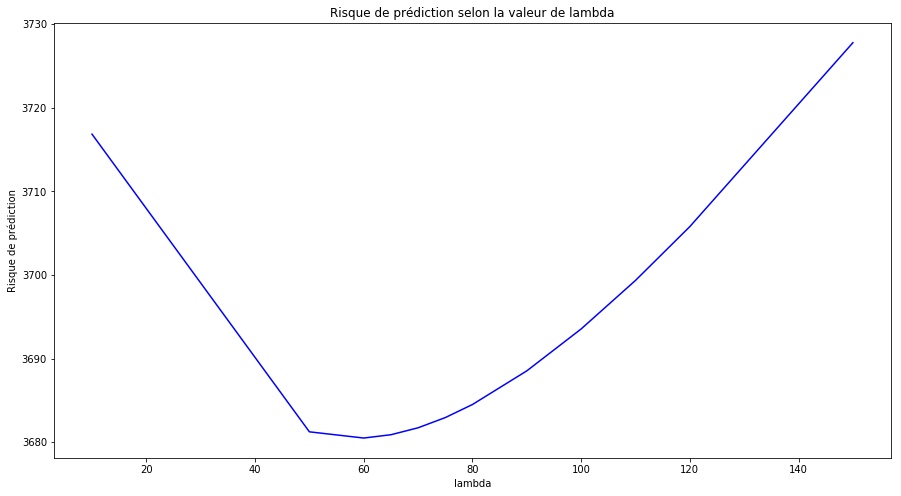

In [26]:
plt.figure(1, figsize=(15, 8))
plt.title("Risque de prédiction selon la valeur de lambda")
plt.xlabel("lambda")
plt.ylabel("Risque de prédiction")
plt.plot(lamdas, Rpreds_Ridge,'-', color='b')
plt.show;

In [27]:
best_lamda = lamdas[np.argmin(Rpreds_Ridge)]
print("Ridge")
print("Le risque de prédiction minimal est atteint pour lambda = {}".format(best_lamda))
best_model_Ridge = Ridge(best_lamda, fit_intercept=False)
best_model_Ridge.fit(X_train-np.mean(X_train), y_train-np.mean(y_train))
y_pred_Ridge = best_model_Ridge.predict(X_test-np.mean(X_test))
Rpred_Ridge = mean_squared_error(y_pred_Ridge,y_test-np.mean(y_test))
print("Le risque de prédiction atteint pour lambda = {} est de {:.0f}".format(best_lamda, Rpred_Ridge))

Ridge
Le risque de prédiction minimal est atteint pour lambda = 60
Le risque de prédiction atteint pour lambda = 60 est de 3704





### Q13
A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO.
Donner le risque de prédiction associé.

In [28]:
from sklearn.linear_model import LassoCV

model_Lasso = LassoCV(cv=3)
# Toujours avec Lasso : variables centrées (pas d'intercept)
model_Lasso.fit(X_train-np.mean(X_train), y_train-np.mean(y_train))
lamda = model_Lasso.alpha_
y_pred_Lasso = model_Lasso.predict(X_test-np.mean(X_test))
Rpred_Lasso = mean_squared_error(y_test-np.mean(y_test), y_pred_Lasso)

print("Lasso")
print("Le risque de prédiction minimal est atteint pour lambda = {:.2f}".format(lamda))
print("Le risque de prédiction atteint pour lambda = {:.2f} est de {:.0f}".format(lamda, Rpred_Lasso))

Lasso
Le risque de prédiction minimal est atteint pour lambda = 4.81
Le risque de prédiction atteint pour lambda = 4.81 est de 3247


### Q14
Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode
OLS aux variables sélectionnées. Cette méthode est appelé Least-square LASSO.

In [29]:
print("Le lasso a sélectionné {:.0f} variables.".format(len(model_Lasso.coef_[model_Lasso.coef_ != 0])))

Le lasso a sélectionné 15 variables.


In [30]:
Least_square_Lasso = linear_model.LinearRegression(fit_intercept=True)
Least_square_Lasso.fit(X_train[:,model_Lasso.coef_ != 0], y_train)
y_Least_square_Lasso = Least_square_Lasso.predict(X_test[:,model_Lasso.coef_ != 0])
Rpred_Least_square_Lasso = mean_squared_error(y_test, y_Least_square_Lasso)
print("Least square Lasso")
print("Le risque de prédiction est de {:.0f}".format(Rpred_Least_square_Lasso))

Least square Lasso
Le risque de prédiction est de 3716


### Q15
Cette dernière question est un question d’ouverture vers une approche non-linéaire. En
utilisant les variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9),
mettre au point une méthode de regression non-linéaire. On apprendra les différents paramètres
par validation croisée et l’on donnera la valeur du risque de prédiction calculé
sur l’échantillon test. Des performances moindres par rapport à OLS peuvent se produire.
Commenter.